In [78]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math

In [79]:
with open(r'../../results/outcomes/Cost/Analyze result/npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

,Strategy,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,total_cost_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br,total_cost_br,total
0,S1,1570000.0,0.0000,1.661640e+05,1730000.0,19800000.0,0.0000,1.661640e+05,20000000.0,21700000.0
1,S2,1570000.0,0.0000,1.661640e+05,1730000.0,73700000.0,314891.7243,1.590000e+06,75600000.0,77300000.0
2,S3,1570000.0,0.0000,1.661640e+05,1730000.0,27200000.0,933516.8186,4.430000e+06,32600000.0,34300000.0
3,S4,13300000.0,314891.7243,1.590000e+06,15200000.0,19800000.0,0.0000,1.661640e+05,20000000.0,35200000.0
4,S5,1570000.0,0.0000,1.661640e+05,1730000.0,27200000.0,933516.8186,4.430000e+06,32600000.0,34300000.0
5,S6,13600000.0,314891.7243,1.590000e+06,15500000.0,31800000.0,314891.7243,1.590000e+06,33700000.0,49200000.0
6,S7,13300000.0,314891.7243,1.590000e+06,15200000.0,73700000.0,314891.7243,1.590000e+06,75600000.0,90800000.0
7,S8,13600000.0,314891.7243,1.590000e+06,15500000.0,31800000.0,314891.7243,1.590000e+06,33700000.0,49200000.0
8,S9,13300000.0,314891.7243,1.590000e+06,15200000.0,73700000.0,314891.7243,1.590000e+06,75600000.0,90800000.0
9,S10,32200000.0,933516.8186,4.430000e+06,37500000.0,15700000.0,933516.8186,4.430000e+06,21000000.0,58500000.0


In [80]:
df_cost = df_cost.set_index('Strategy')

In [81]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br', 'total'], axis=1)

In [82]:
df_cost

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1570000.0,0.0000,1.661640e+05,19800000.0,0.0000,1.661640e+05
S2,1570000.0,0.0000,1.661640e+05,73700000.0,314891.7243,1.590000e+06
S3,1570000.0,0.0000,1.661640e+05,27200000.0,933516.8186,4.430000e+06
S4,13300000.0,314891.7243,1.590000e+06,19800000.0,0.0000,1.661640e+05
S5,1570000.0,0.0000,1.661640e+05,27200000.0,933516.8186,4.430000e+06
S6,13600000.0,314891.7243,1.590000e+06,31800000.0,314891.7243,1.590000e+06
S7,13300000.0,314891.7243,1.590000e+06,73700000.0,314891.7243,1.590000e+06
S8,13600000.0,314891.7243,1.590000e+06,31800000.0,314891.7243,1.590000e+06
S9,13300000.0,314891.7243,1.590000e+06,73700000.0,314891.7243,1.590000e+06


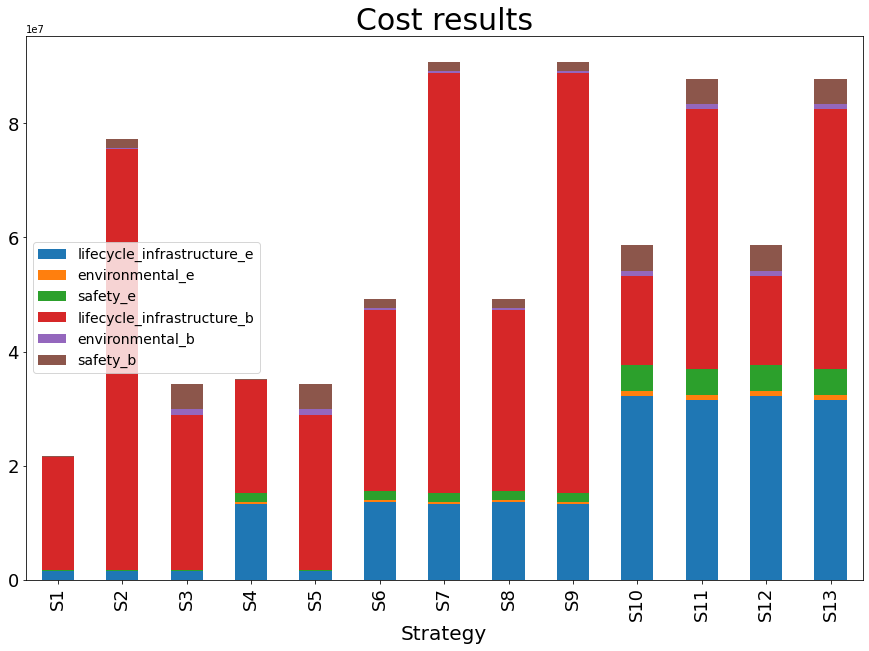

In [83]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

In [84]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

,Strategy,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
0,S1,0.000000,1.190000e+09,0.000000,2620000.0
1,S2,0.000000,1.190000e+09,1020.823948,1910000.0
2,S3,0.000000,1.190000e+09,2220.392903,1250000.0
3,S4,1020.823948,8.650000e+08,0.000000,2620000.0
4,S5,2220.392903,5.670000e+08,0.000000,2620000.0
5,S6,1020.823948,8.650000e+08,1020.823948,1910000.0
6,S7,1020.823948,8.650000e+08,1020.823948,1910000.0
7,S8,1020.823948,8.650000e+08,1020.823948,1910000.0
8,S9,1020.823948,8.650000e+08,1020.823948,1910000.0
9,S10,2220.392903,5.670000e+08,2220.392903,1250000.0


In [85]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [86]:
df_loss_benefit

,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
Strategy,,,,
S1,0.000000,1.190000e+09,0.000000,2620000.0
S2,0.000000,1.190000e+09,1020.823948,1910000.0
S3,0.000000,1.190000e+09,2220.392903,1250000.0
S4,1020.823948,8.650000e+08,0.000000,2620000.0
S5,2220.392903,5.670000e+08,0.000000,2620000.0
S6,1020.823948,8.650000e+08,1020.823948,1910000.0
S7,1020.823948,8.650000e+08,1020.823948,1910000.0
S8,1020.823948,8.650000e+08,1020.823948,1910000.0
S9,1020.823948,8.650000e+08,1020.823948,1910000.0


In [87]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [88]:
df_loss

,economic_losses_el,economic_loss_br
Strategy,,
S1,1.190000e+09,2620000.0
S2,1.190000e+09,1910000.0
S3,1.190000e+09,1250000.0
S4,8.650000e+08,2620000.0
S5,5.670000e+08,2620000.0
S6,8.650000e+08,1910000.0
S7,8.650000e+08,1910000.0
S8,8.650000e+08,1910000.0
S9,8.650000e+08,1910000.0


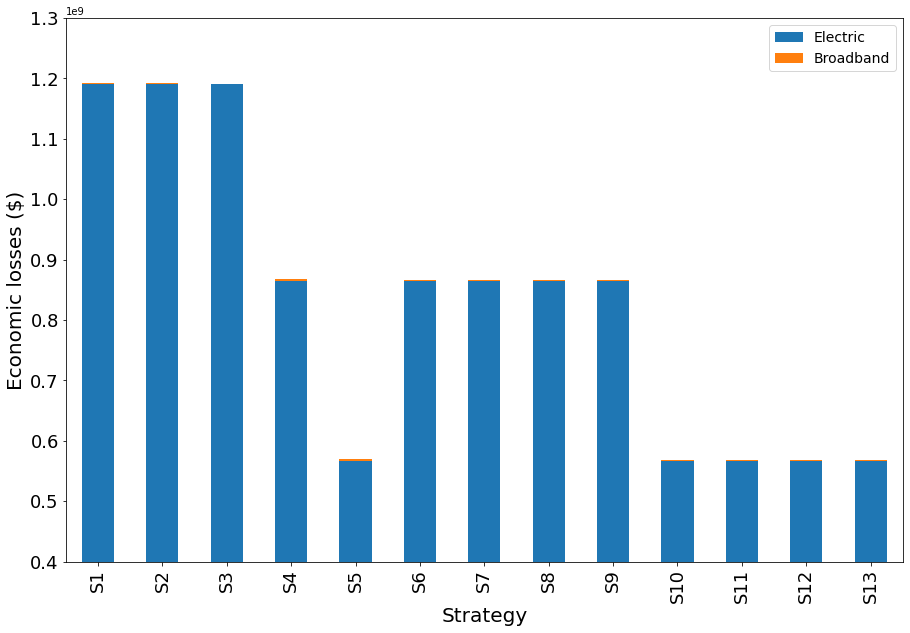

In [160]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.ylim([400000000, 1300000000])
plt.grid()
#plt.title("loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.ylabel('Economic losses ($)',fontsize=20)
plt.legend(['Electric','Broadband'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss.png')

In [90]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)

In [91]:
df_benefit

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
S1,0.000000,0.000000
S2,0.000000,1020.823948
S3,0.000000,2220.392903
S4,1020.823948,0.000000
S5,2220.392903,0.000000
S6,1020.823948,1020.823948
S7,1020.823948,1020.823948
S8,1020.823948,1020.823948
S9,1020.823948,1020.823948


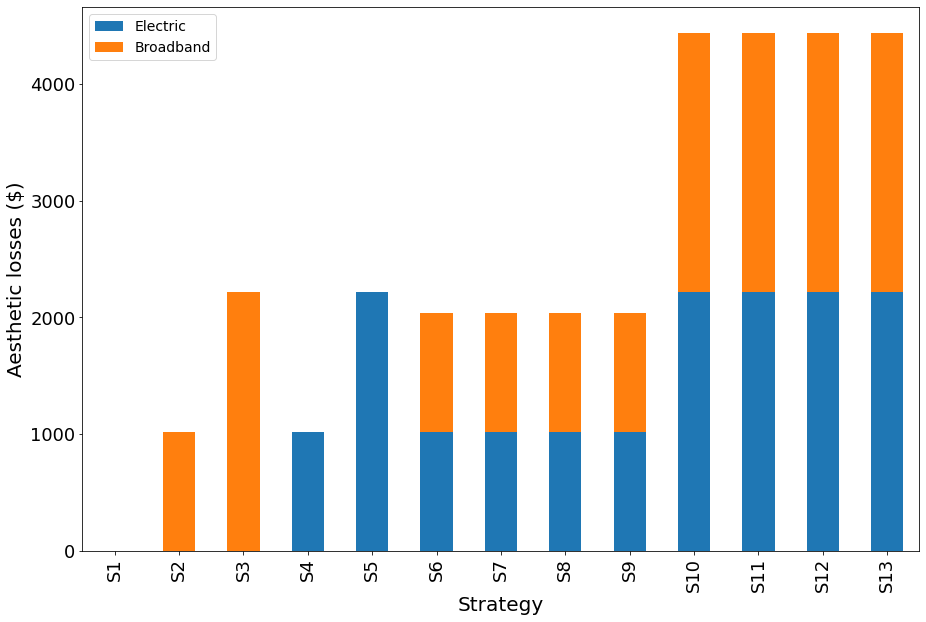

In [161]:
# plotting benefit results
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.ylabel('Aesthetic losses ($)',fontsize=20)
plt.legend(['Electric','Broadband'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit.png')

In [151]:
with open(r'../../results/outcomes/npv_cost_loss_benefit.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,S1,2420000.0,0.0,332000.0,2750000.0,0.0,1.190000e+09,-1.190000e+09
1,S2,7300000.0,315000.0,1760000.0,9380000.0,1020.0,1.190000e+09,-1.200000e+09
2,S3,15100000.0,934000.0,4600000.0,20600000.0,2220.0,1.190000e+09,-1.210000e+09
3,S4,14100000.0,315000.0,1760000.0,16200000.0,1020.0,8.680000e+08,-8.840000e+08
4,S5,15100000.0,934000.0,4600000.0,20600000.0,2220.0,5.700000e+08,-5.910000e+08
5,S6,15500000.0,630000.0,3180000.0,19300000.0,2040.0,8.670000e+08,-8.860000e+08
6,S7,19000000.0,630000.0,3180000.0,22800000.0,2040.0,8.670000e+08,-8.900000e+08
7,S8,15500000.0,630000.0,3180000.0,19300000.0,2040.0,8.670000e+08,-8.860000e+08
8,S9,19000000.0,630000.0,3180000.0,22800000.0,2040.0,8.670000e+08,-8.900000e+08
9,S10,36800000.0,1870000.0,8860000.0,47500000.0,4440.0,5.680000e+08,-6.160000e+08


In [152]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [153]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
Strategy,,,,,,,
S1,2420000.0,0.0,332000.0,2750000.0,0.0,1.190000e+09,-1.190000e+09
S2,7300000.0,315000.0,1760000.0,9380000.0,1020.0,1.190000e+09,-1.200000e+09
S3,15100000.0,934000.0,4600000.0,20600000.0,2220.0,1.190000e+09,-1.210000e+09
S4,14100000.0,315000.0,1760000.0,16200000.0,1020.0,8.680000e+08,-8.840000e+08
S5,15100000.0,934000.0,4600000.0,20600000.0,2220.0,5.700000e+08,-5.910000e+08
S6,15500000.0,630000.0,3180000.0,19300000.0,2040.0,8.670000e+08,-8.860000e+08
S7,19000000.0,630000.0,3180000.0,22800000.0,2040.0,8.670000e+08,-8.900000e+08
S8,15500000.0,630000.0,3180000.0,19300000.0,2040.0,8.670000e+08,-8.860000e+08
S9,19000000.0,630000.0,3180000.0,22800000.0,2040.0,8.670000e+08,-8.900000e+08


In [154]:
df_npv_net_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [155]:
df_npv_net_benefit

,net_benefit
Strategy,
S1,-1.190000e+09
S2,-1.200000e+09
S3,-1.210000e+09
S4,-8.840000e+08
S5,-5.910000e+08
S6,-8.860000e+08
S7,-8.900000e+08
S8,-8.860000e+08
S9,-8.900000e+08


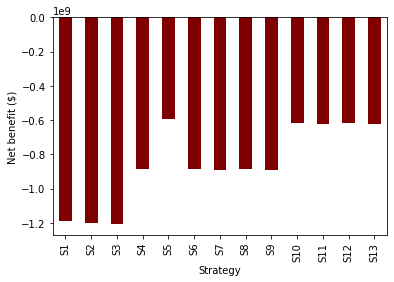

In [168]:
# plotting graph
df_npv_net_benefit.plot(ylabel='Net benefit ($)', kind="bar", color="maroon", legend=False)
plt.savefig(r'../../figures/npv.png')

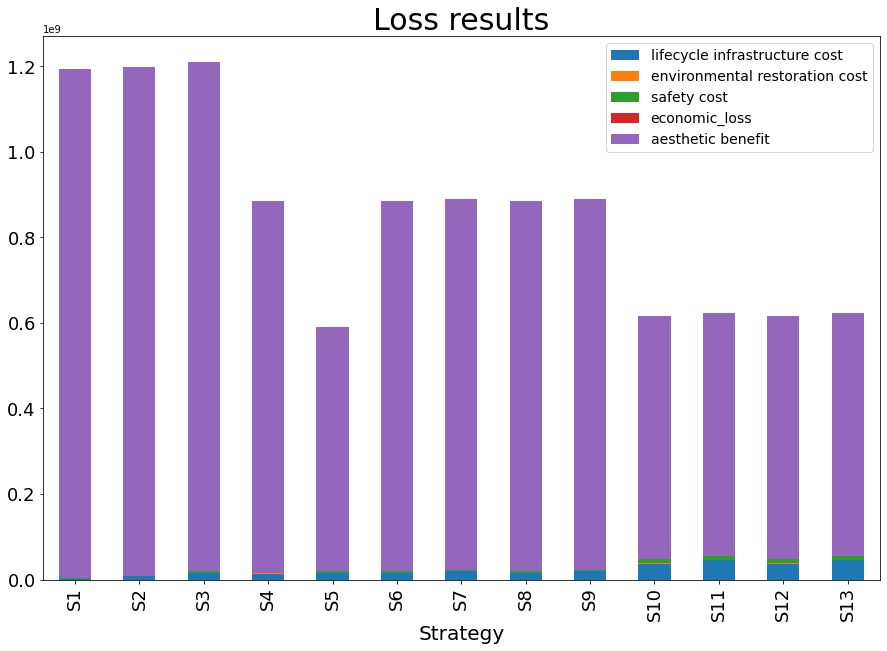

In [96]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png')

In [97]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['economic_losses', 'aesthetic_benefit'], axis=1)

In [98]:
df_npv_cost

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
S1,2420000.0,0.0,332000.0
S2,7300000.0,315000.0,1760000.0
S3,15100000.0,934000.0,4600000.0
S4,14100000.0,315000.0,1760000.0
S5,15100000.0,934000.0,4600000.0
S6,15500000.0,630000.0,3180000.0
S7,19000000.0,630000.0,3180000.0
S8,15500000.0,630000.0,3180000.0
S9,19000000.0,630000.0,3180000.0


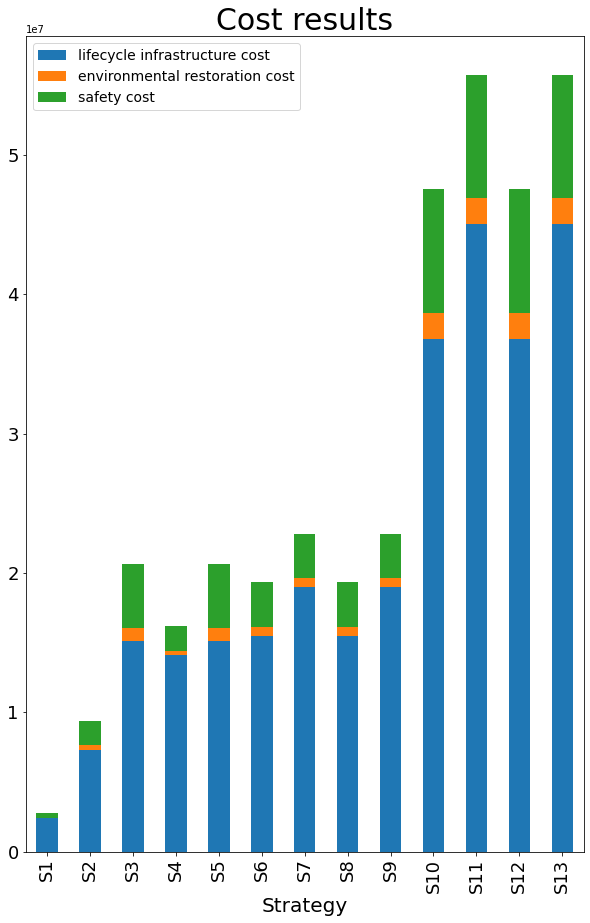

In [99]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-integrated.png')

In [100]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

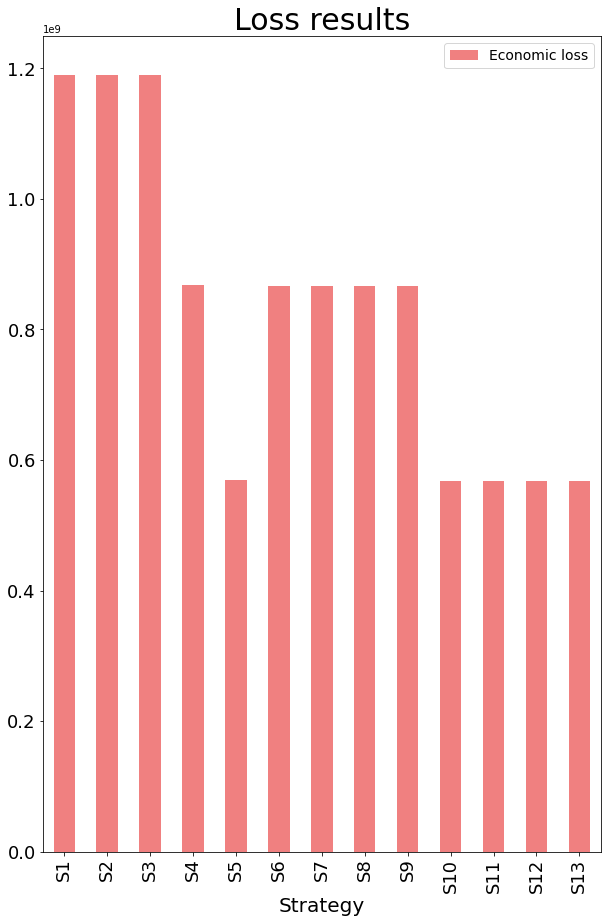

In [101]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Economic loss'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss-integrated.png')

In [102]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

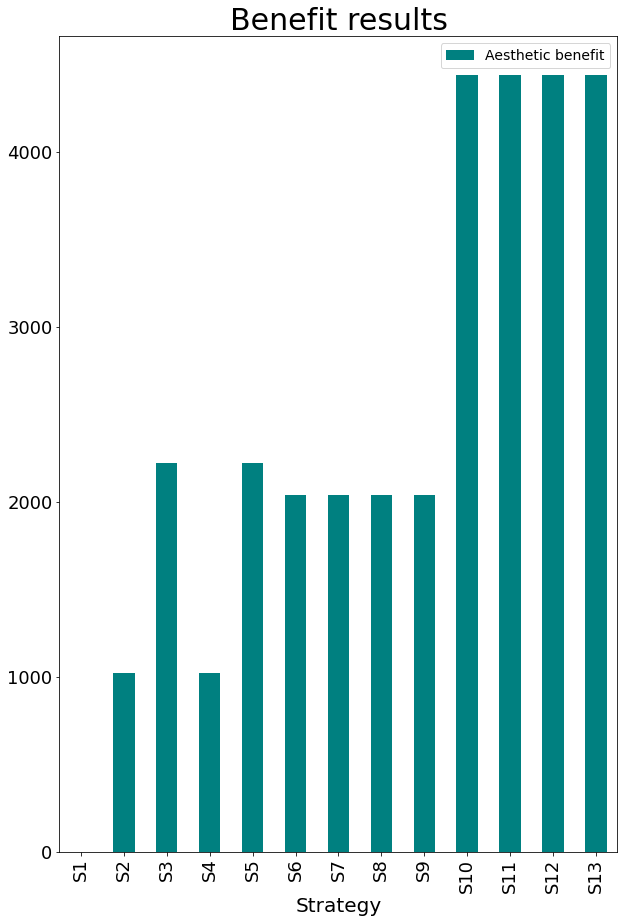

In [103]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit-integrated.png')

In [147]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,S2,4880000.0,315000.0,1430000.0,6630000.0,1020.0,0.0,-6620000.0
2,S3,12700000.0,934000.0,4270000.0,17900000.0,2220.0,0.0,-17900000.0
3,S4,11700000.0,315000.0,1430000.0,13400000.0,1020.0,-322000000.0,309000000.0
4,S5,12700000.0,934000.0,4270000.0,17900000.0,2220.0,-620000000.0,602000000.0
5,S6,13100000.0,630000.0,2850000.0,16600000.0,2040.0,-323000000.0,306000000.0
6,S7,16600000.0,630000.0,2850000.0,20100000.0,2040.0,-323000000.0,303000000.0
7,S8,13100000.0,630000.0,2850000.0,16600000.0,2040.0,-323000000.0,306000000.0
8,S9,16600000.0,630000.0,2850000.0,20100000.0,2040.0,-323000000.0,303000000.0
9,S10,34400000.0,1870000.0,8530000.0,44800000.0,4440.0,-622000000.0,577000000.0


In [148]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

In [149]:
df_npv_net_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

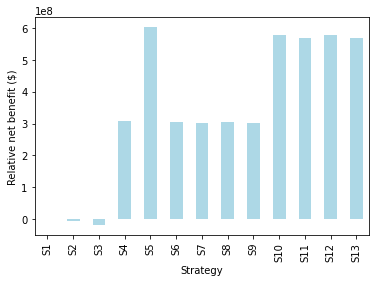

In [167]:
# plotting graph
df_npv_net_benefit_relative.plot(ylabel='Relative net benefit ($)', kind="bar", color="lightblue", legend=False)
plt.savefig(r'../../figures/relative-npv.png')

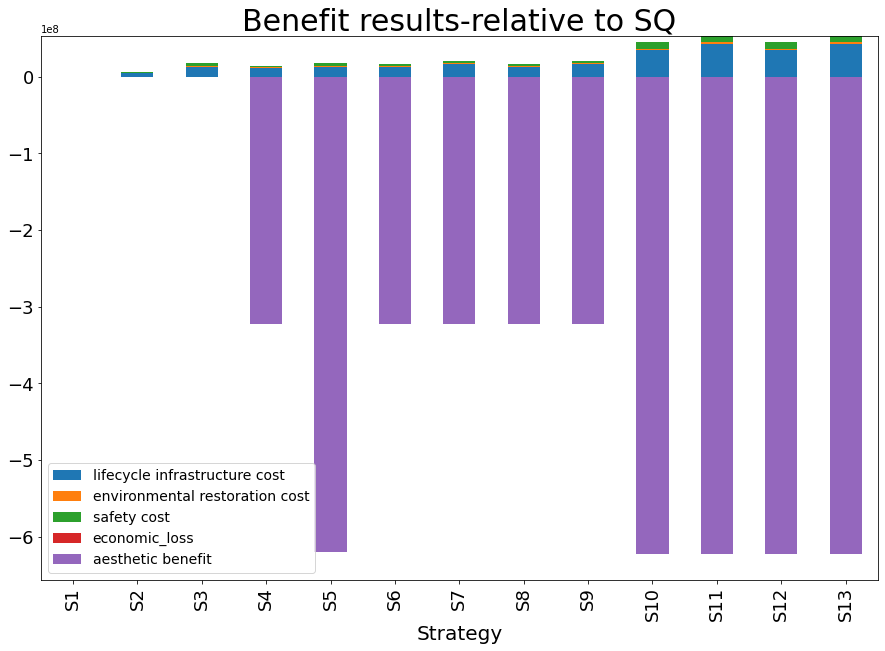

In [115]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png')

In [116]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['economic_losses', 'aesthetic_benefit'], axis=1)

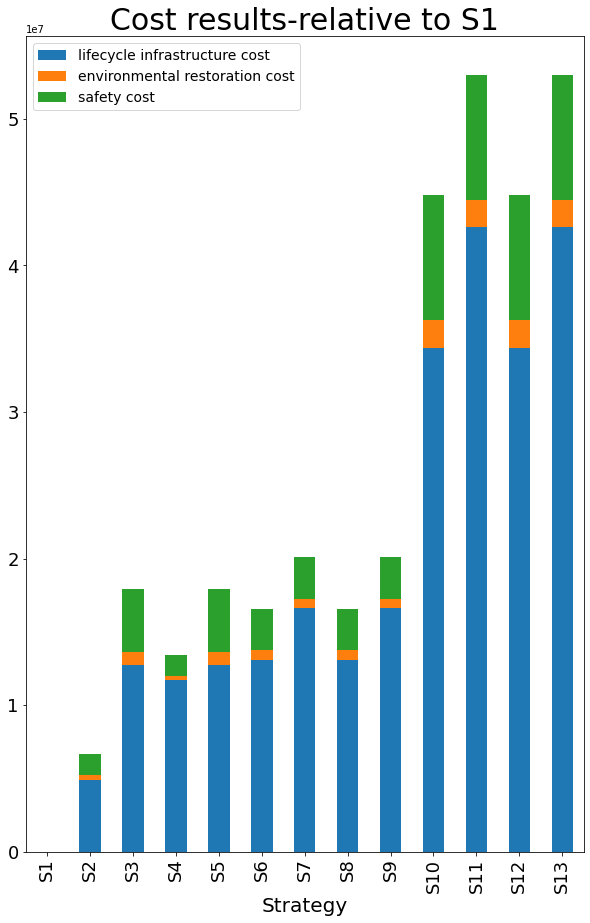

In [117]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Cost results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-integrated-relative.png')

In [118]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

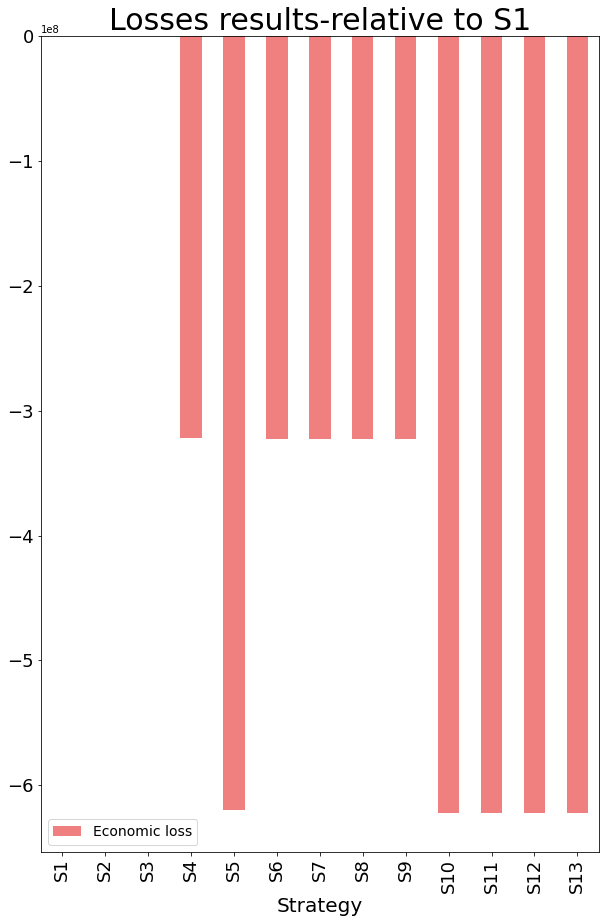

In [119]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Losses results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Economic loss'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss-integrated-relative.png')

In [120]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

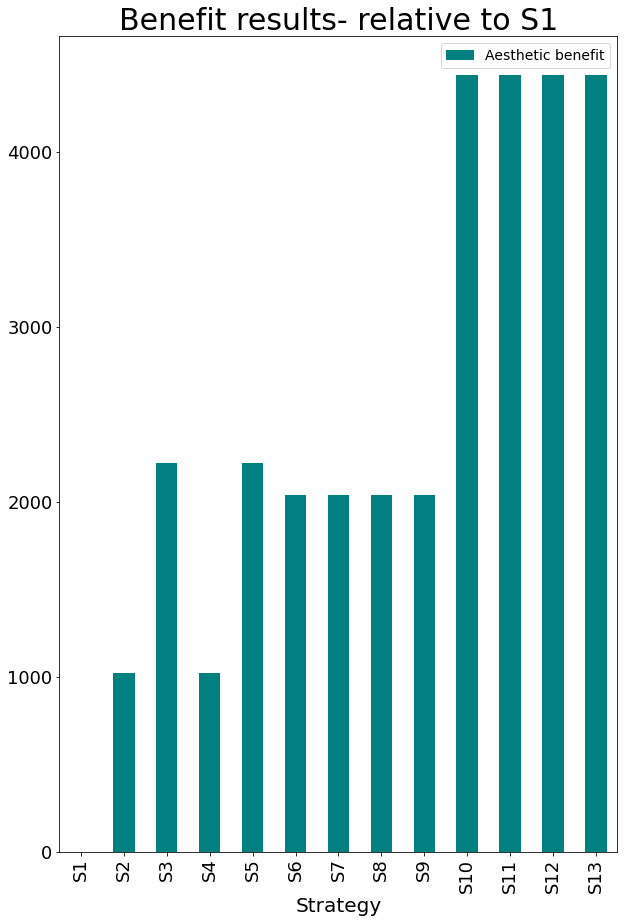

In [121]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results- relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png')